In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d



import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/'
x1ds = np.hstack((glob.glob('{}/*x1d.fits'.format(path)), glob.glob('{}/*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44040_sx1.fits'],
      dtype='<U67')

/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44010_x1d.fits
G140L
[513.3294]


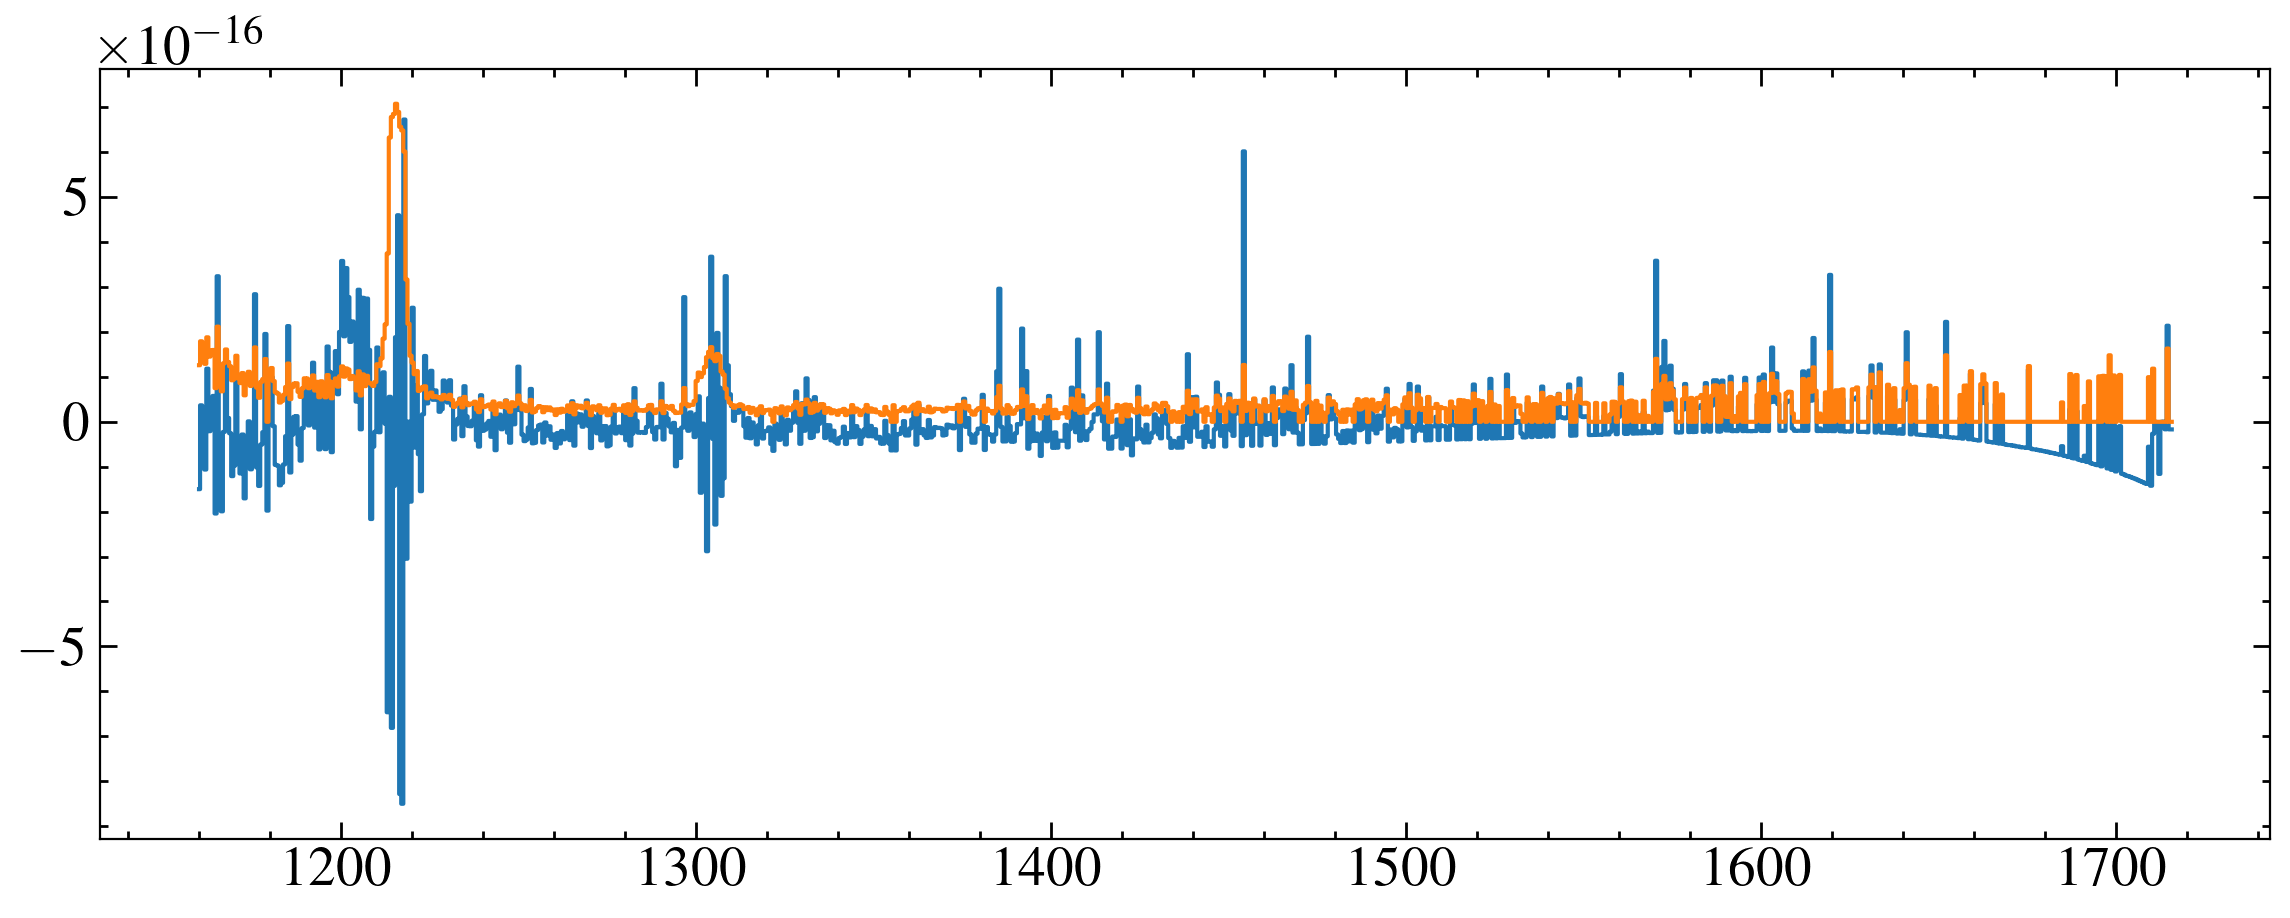

/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44020_x1d.fits
G140L
[511.43042]


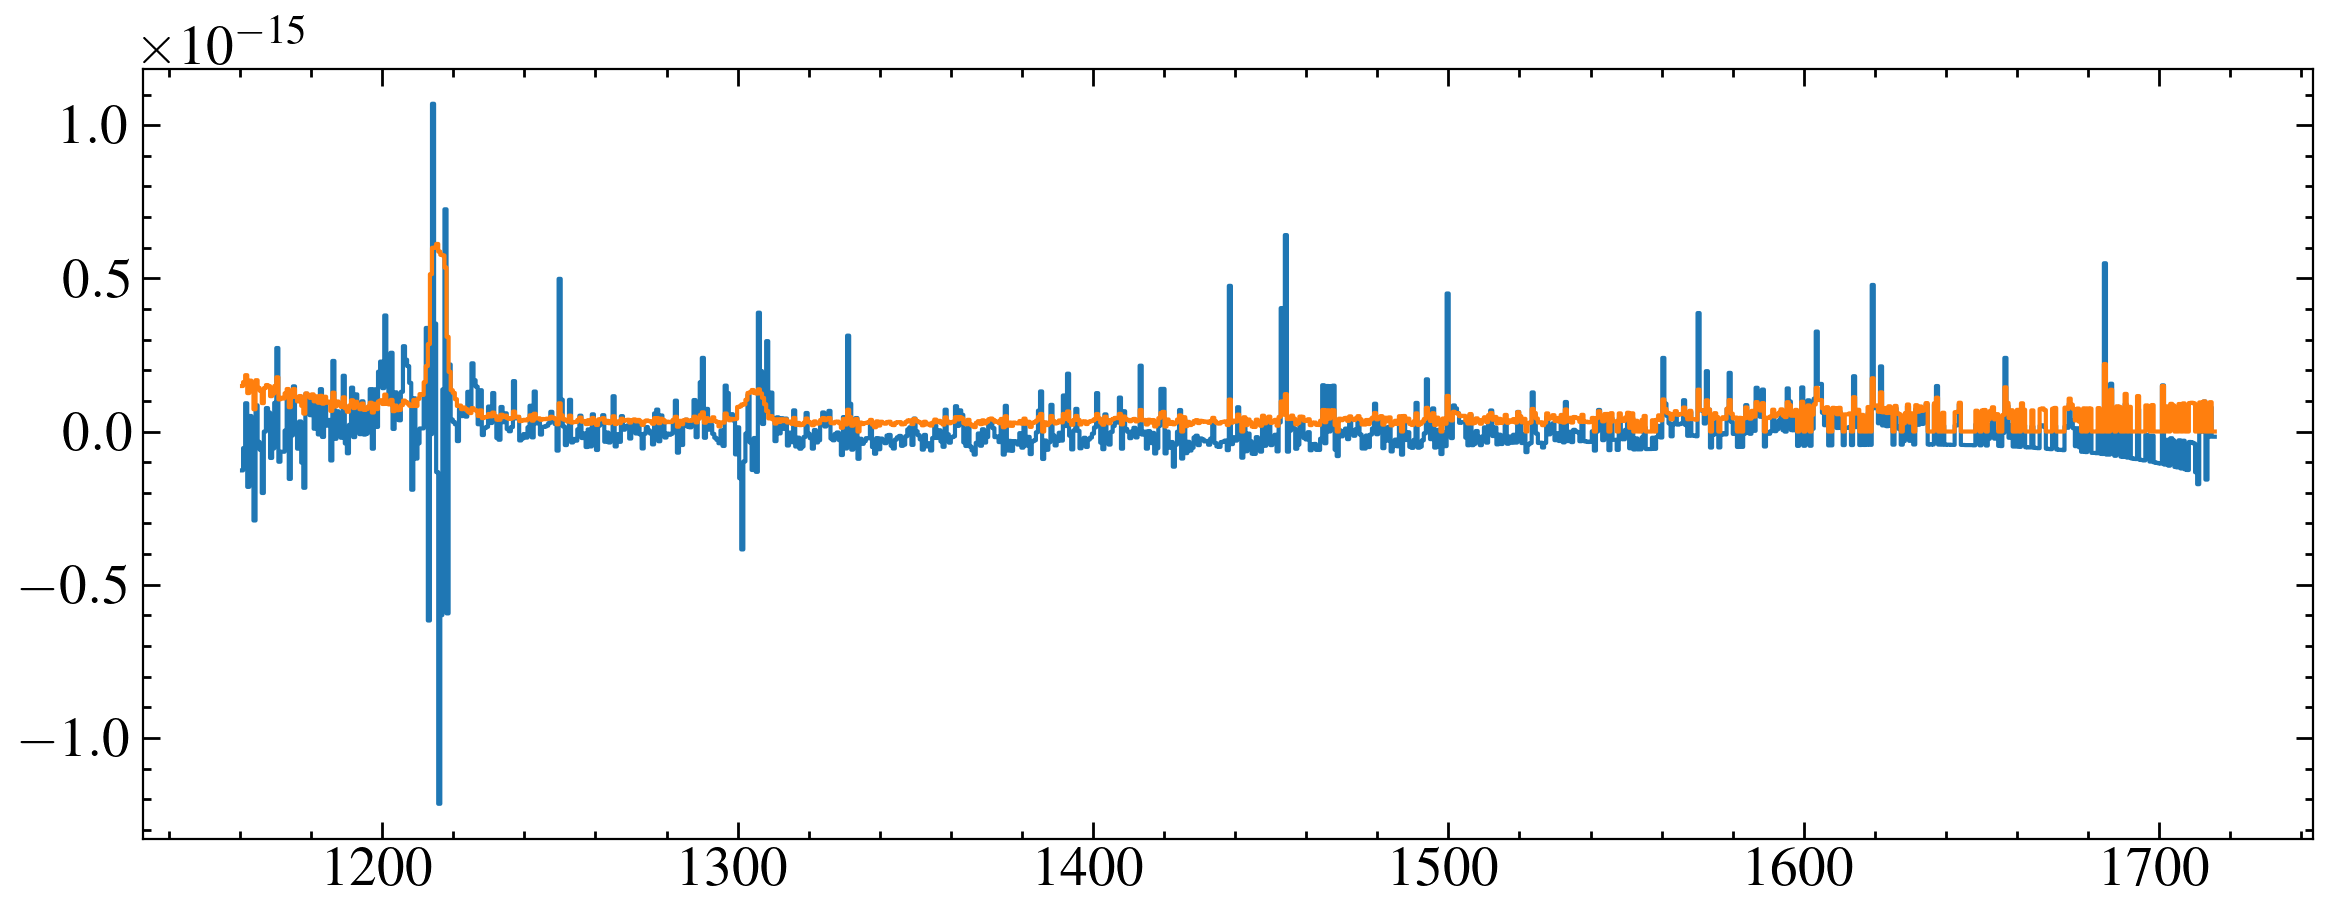

/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44030_x1d.fits
G230L
[498.7415]


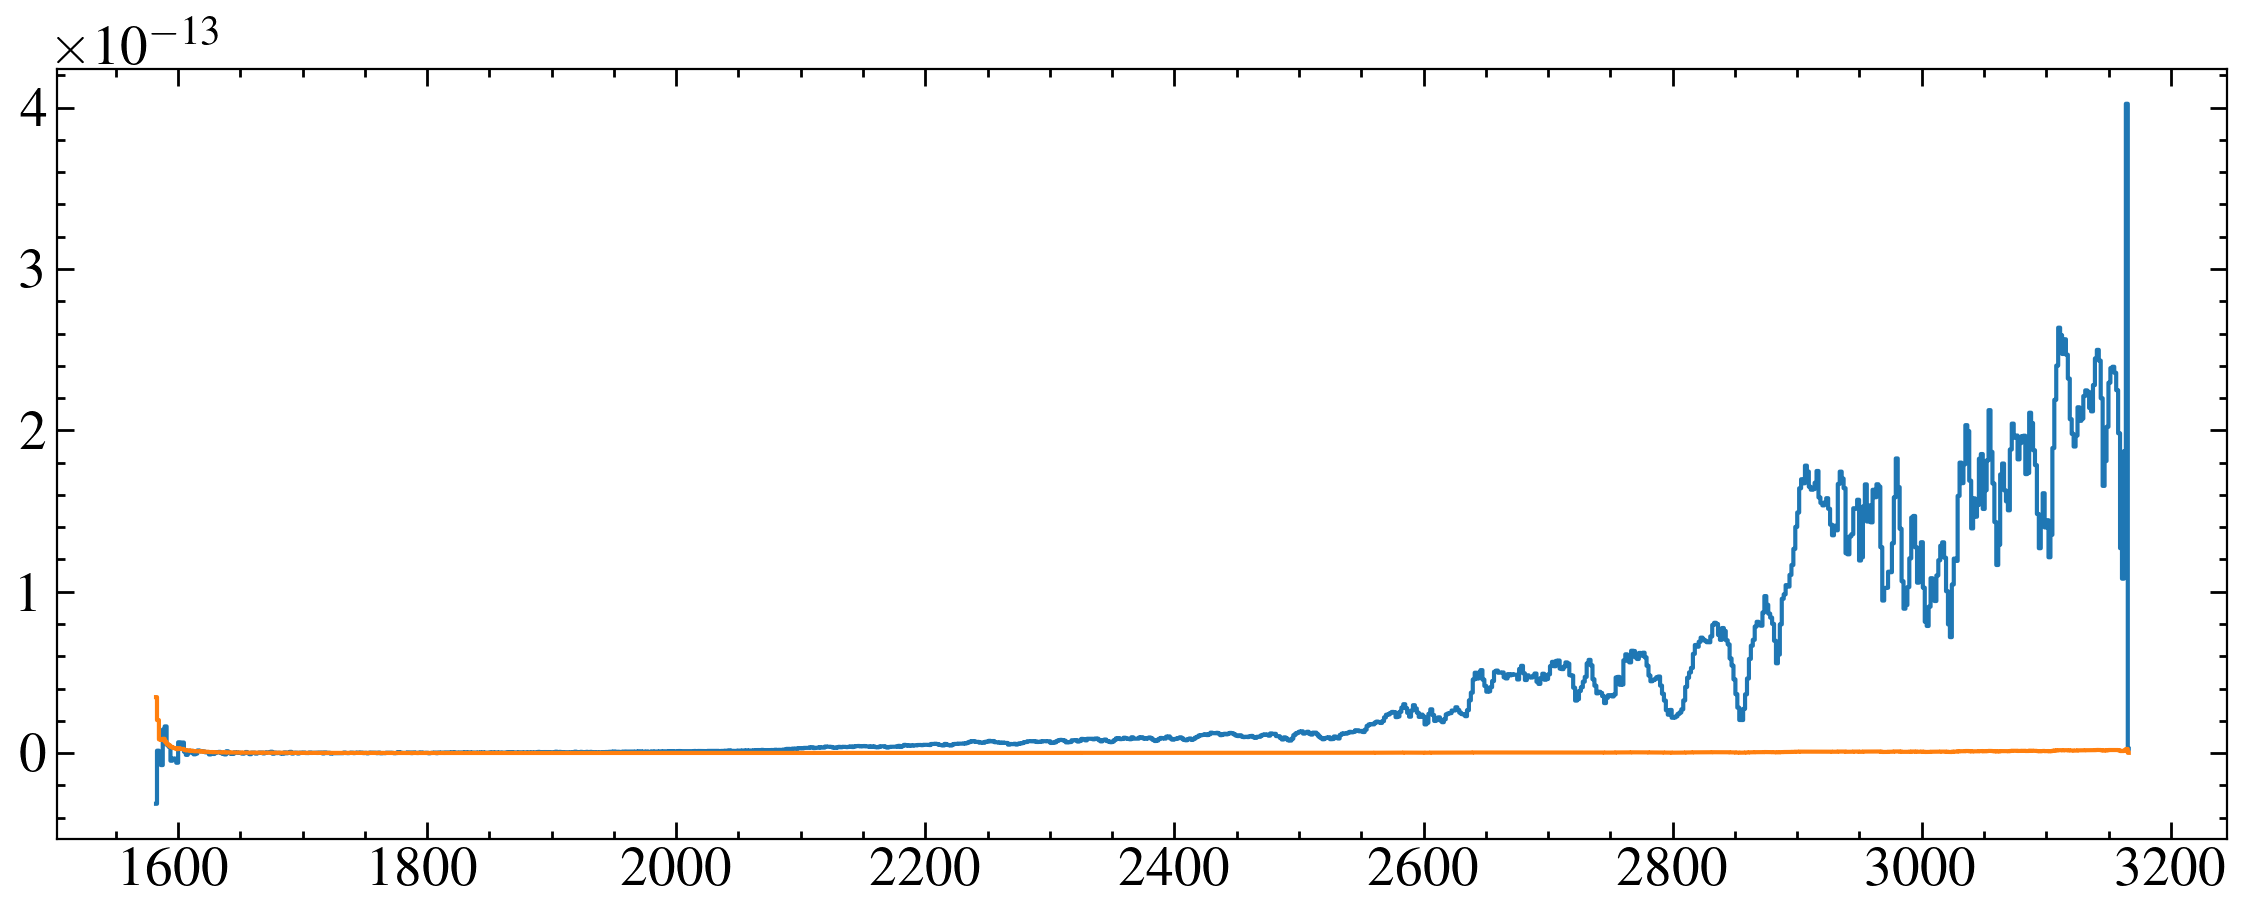

/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44040_sx1.fits
G430L
[894.887]


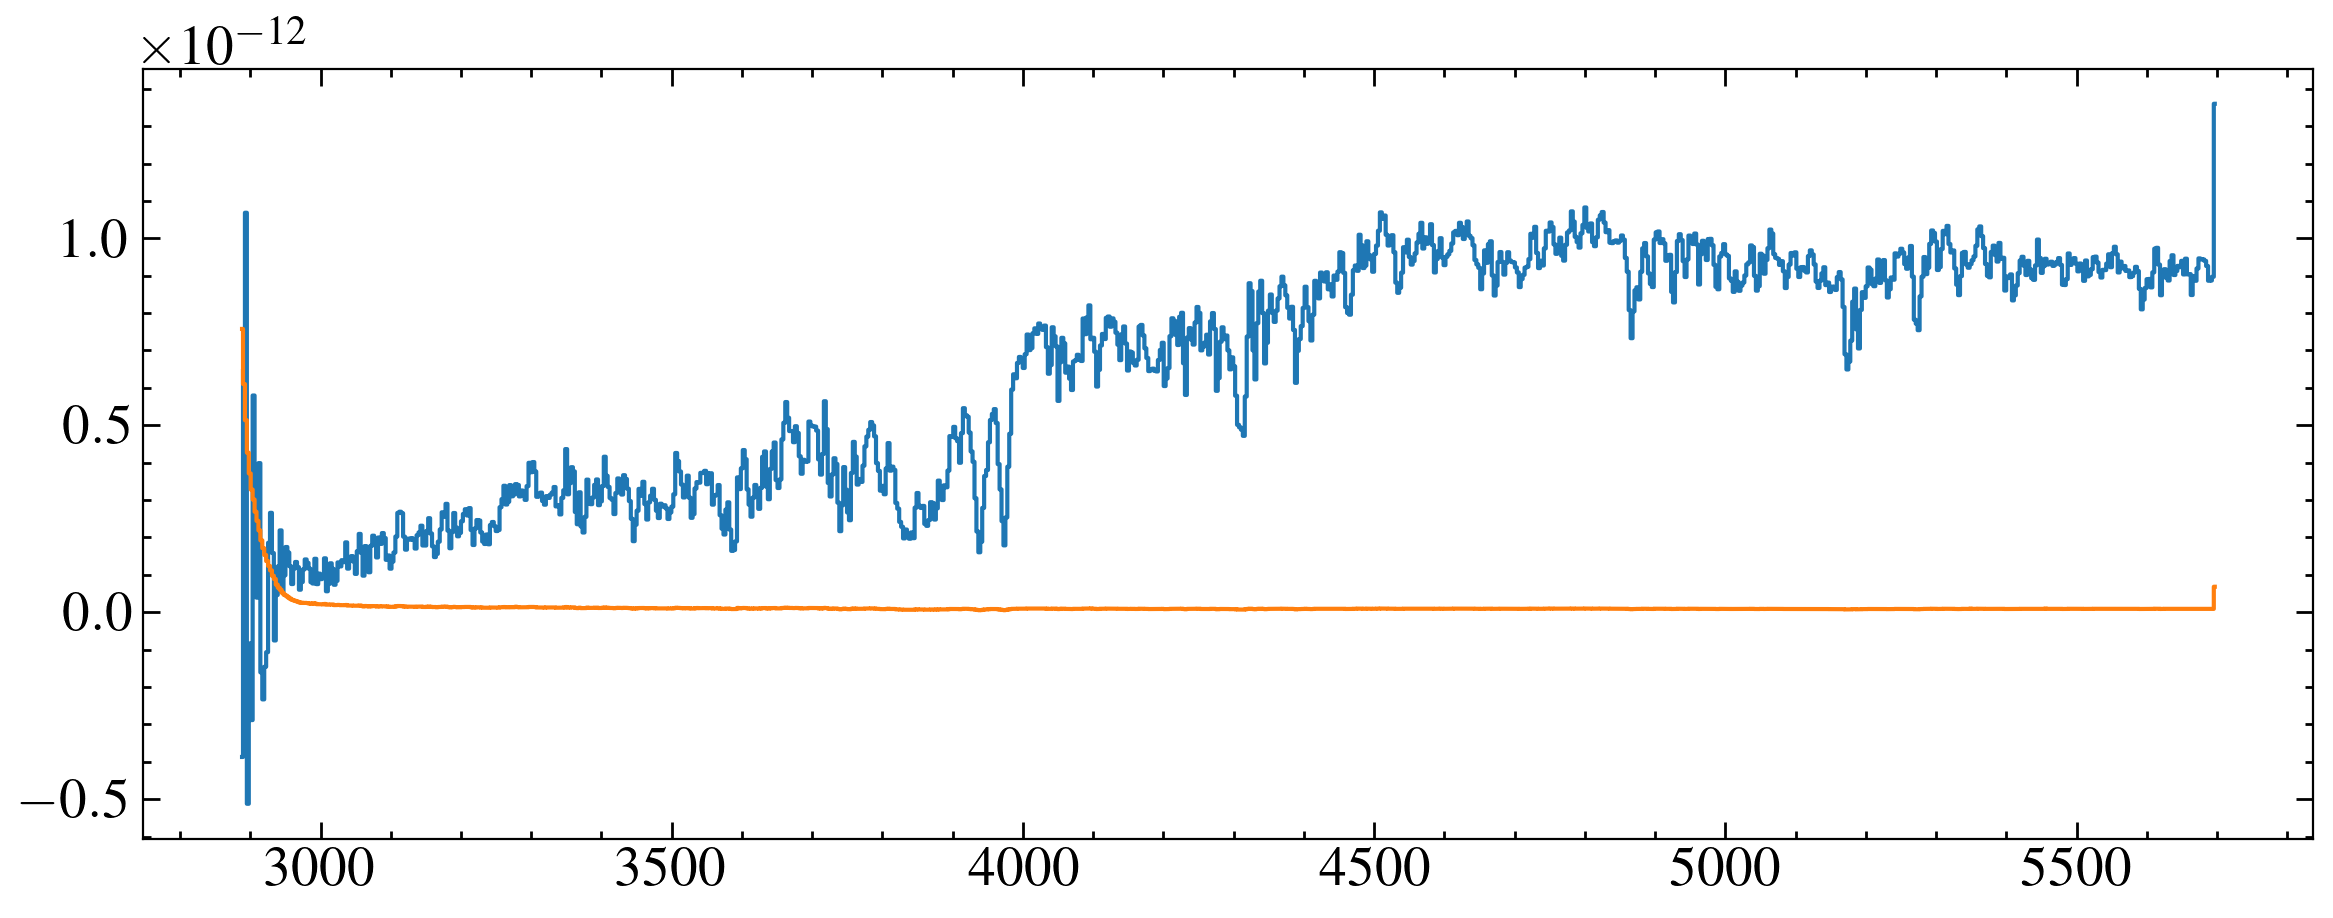

In [3]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()


G140L data is not great...

In [4]:
import stistools
os.environ['oref'] = path

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


[97.29436]
[97.667175]
reextractions/hd80606/oeoo44010_new_x1d.fits
G140L
97.29436


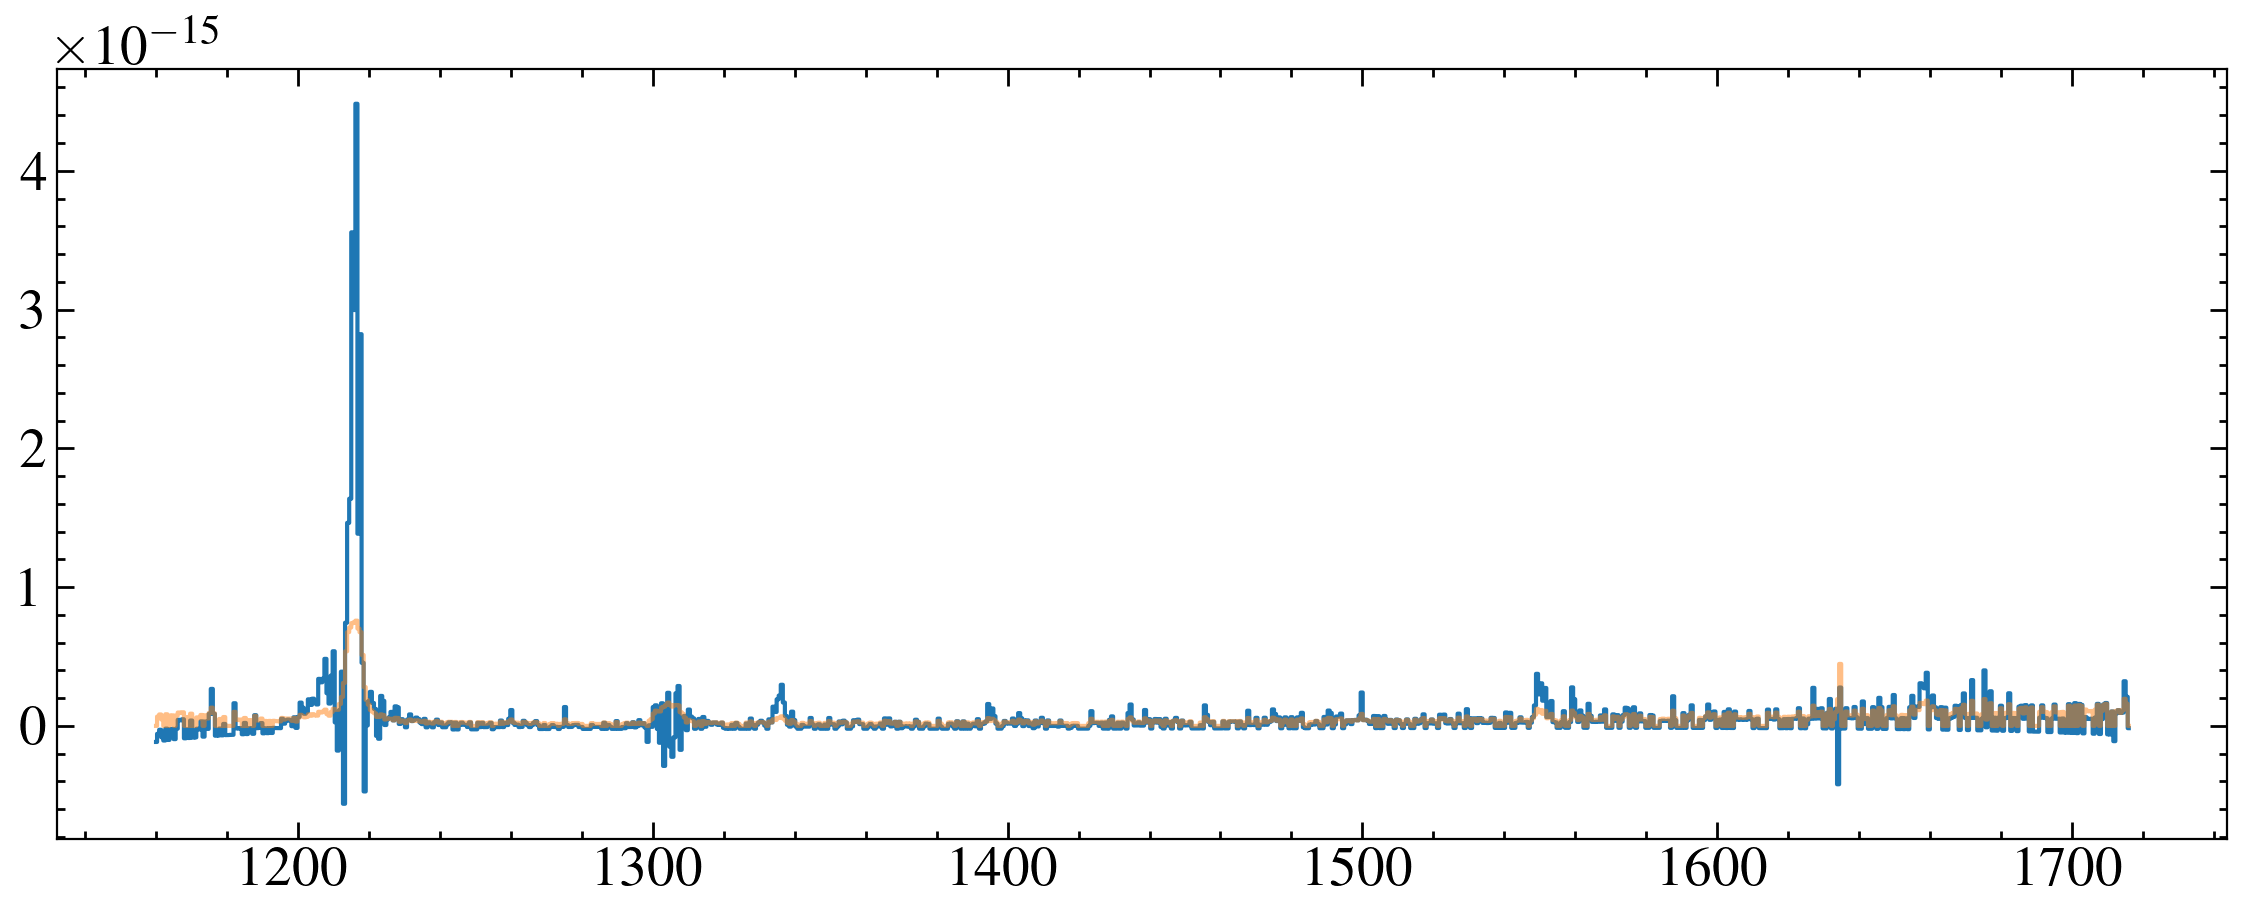

reextractions/hd80606/oeoo44020_new_x1d.fits
G140L
97.667175


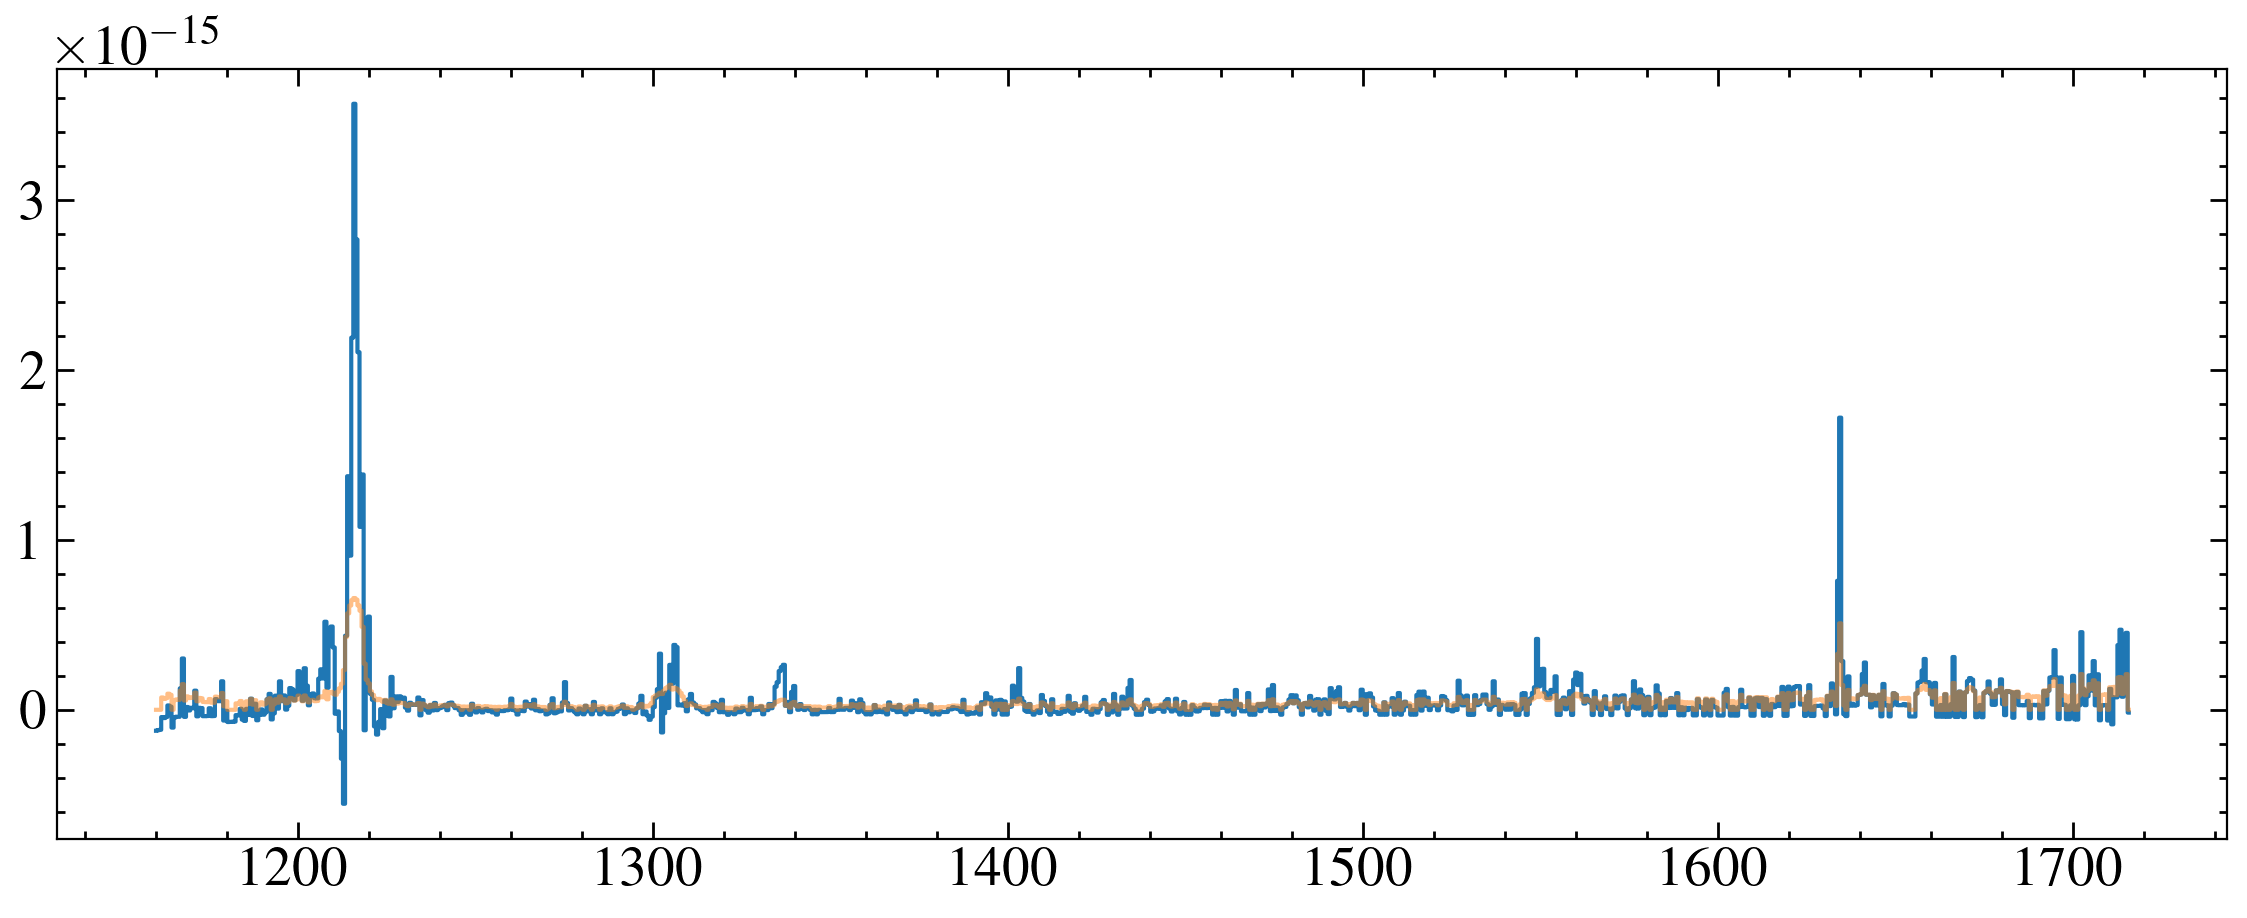

In [5]:
roots = ['oeoo44010', 'oeoo44020']

# xs = [375, 374, 374, 372, 403, 406]
ys = [97, 97]

for i, root in  enumerate(roots):
    flt = '{}{}_flt.fits'.format(path, root)
    SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
    grating = fits.getheader(flt,0)['OPT_ELEM']
    cenwave = fits.getheader(flt,0)['CENWAVE']
    # tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/hd80606/{}_new_x1d.fits'.format(rootname)
    if os.path.exists(outname):
        os.remove(outname)
    # a2center = get_a2center(xs[i],ys[i], tracegrid)
    # print(root)
    # print(a2center)
    a2center = ys[i]
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/hd80606/{}_new.trl'.format(rootname), a2center=a2center, 
                          maxsrch=5, bk1offst=-30, bk2offst=30,bk1size=5, bk2size=5,)
    print(fits.getdata('reextractions/hd80606/{}_new_x1d.fits'.format(rootname),1)['A2CENTER'])

new_x1ds = glob.glob('reextractions/hd80606/*new_x1d.fits')
for x in new_x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e, dq= data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160) #& (w < 1210) | (w > 1220)

    
    w, f, e = w[mask], f[mask], e[mask]

    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid', alpha=0.5)
    # plt.ylim(-0.5e-14,3e-14 )
    
    # data = fits.getdata(x1ds[1], 1)[0]
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # plt.plot(w, f, zorder=-1, ls='--')
    
    plt.show()
    

In [6]:
use_x1ds = np.hstack((new_x1ds, x1ds[2:]))
use_x1ds

array(['reextractions/hd80606/oeoo44010_new_x1d.fits',
       'reextractions/hd80606/oeoo44020_new_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44040_sx1.fits'],
      dtype='<U67')

In [7]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**0.5
    return flux,error

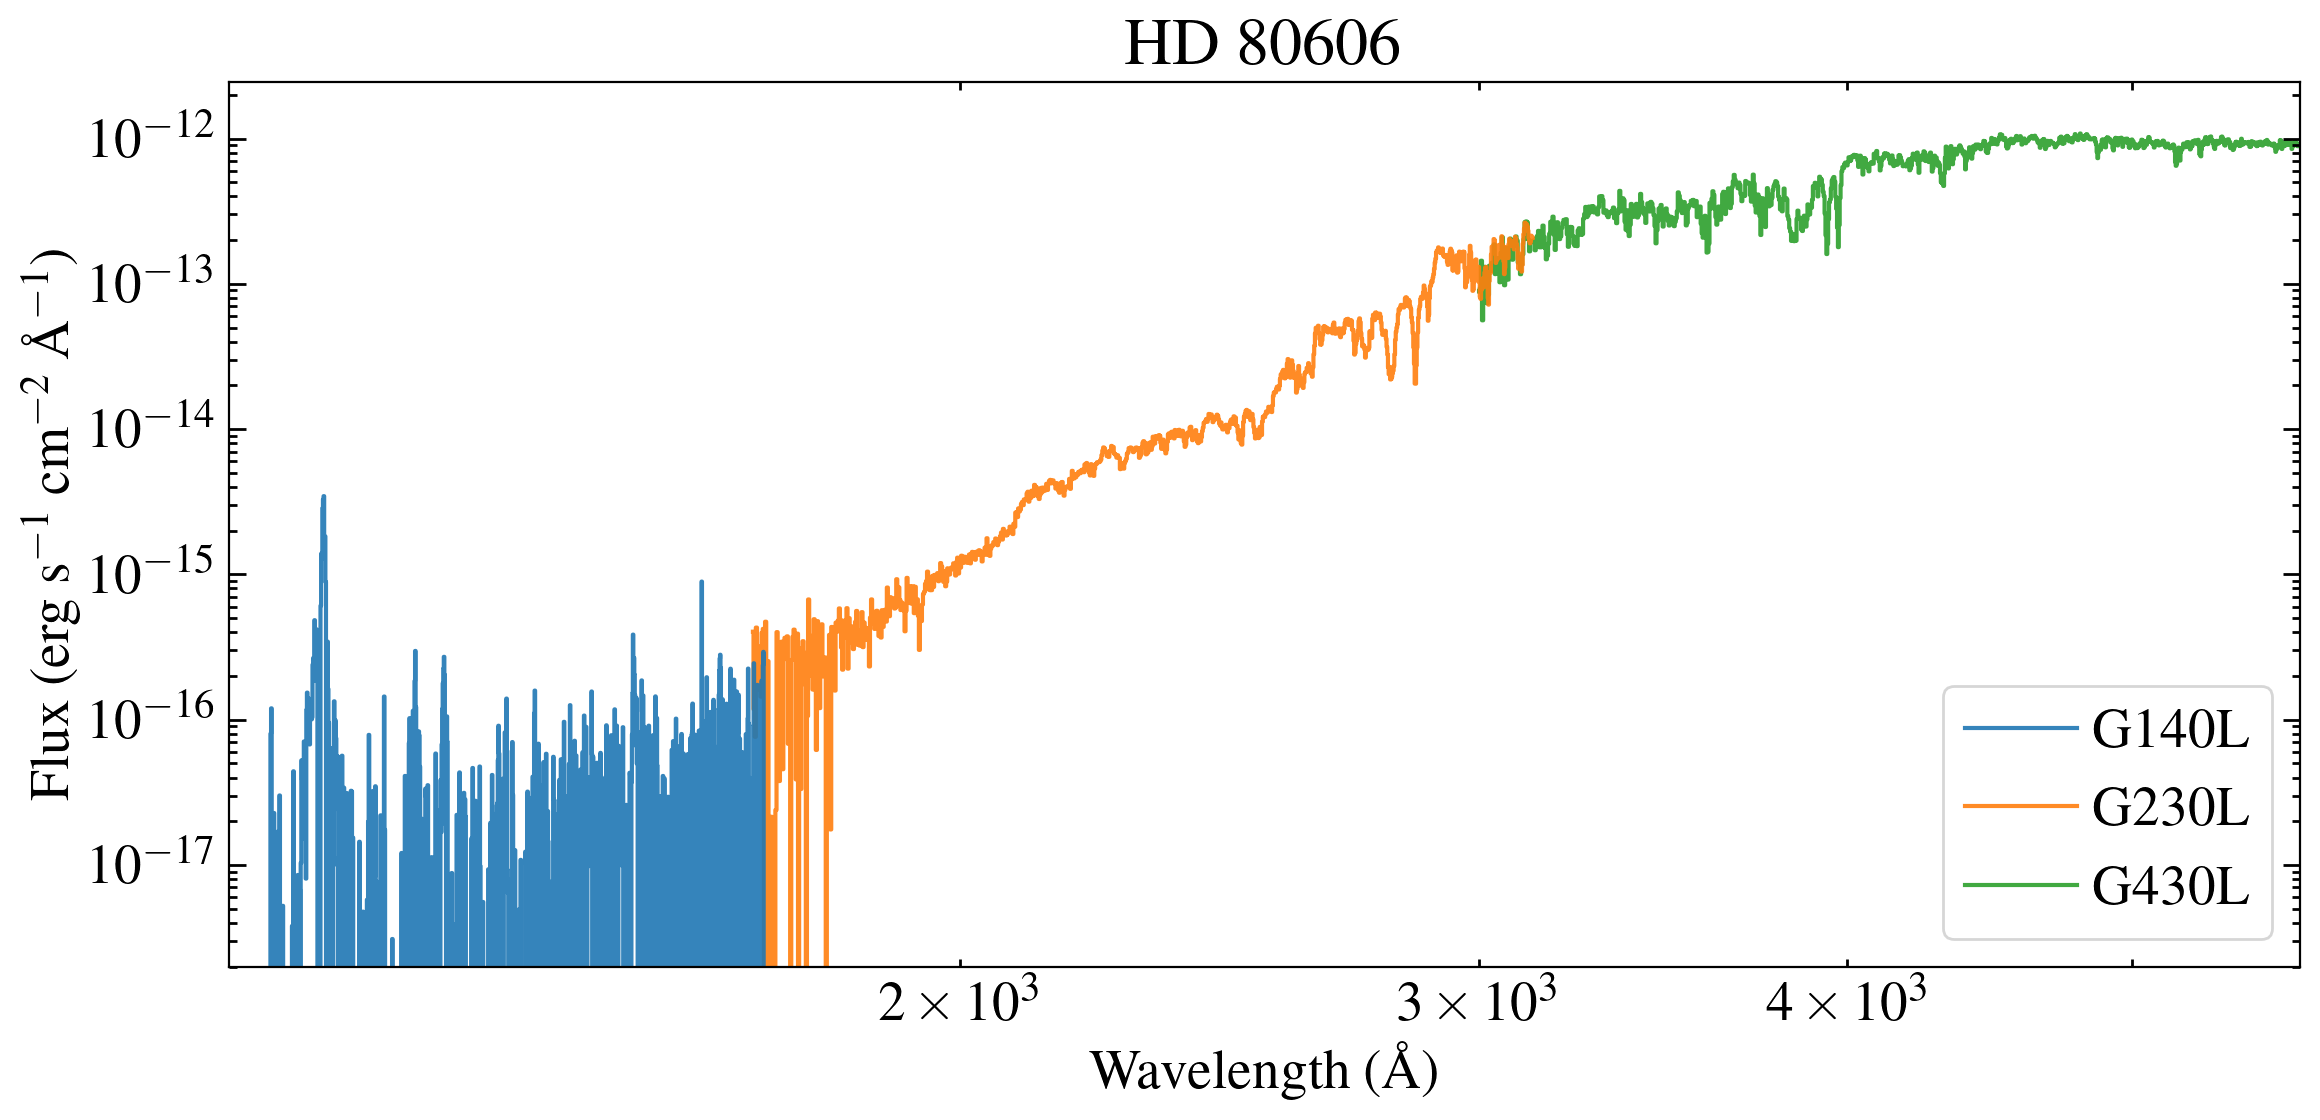

In [8]:
w_fuv = []
f_fuv = []
e_fuv = []
roots = []
n=0
for x in use_x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        roots.append(fits.getheader(x, 0)['ROOTNAME'])
        mask = (w > 1160)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_fuv = w
            f_fuv.append(f)
            e_fuv.append(e)
        else:
            f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
            e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
        n +=1
    if grating == 'G230L':
        mask = (w > 1700) & (w <3130)
        w_nuv, f_nuv, e_nuv = w[mask], f[mask], e[mask]
    if grating == 'G430L':
        mask = (w > 3000) & (w <5690)
        w_opt, f_opt, e_opt = w[mask], f[mask], e[mask]


        
        
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)
# mask = (f_fuv > 0)
# w_fuv, f_fuv, e_fuv = w_fuv[mask], f_fuv[mask], e_fuv[mask]


plt.figure(figsize=(12, 6))

plt.step(w_fuv, f_fuv, where='mid', label='G140L', alpha=0.9)
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1, alpha=0.9)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2, alpha=0.9)

plt.yscale('log')
plt.xscale('log')
plt.ylim(2e-18)

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('HD 80606')
plt.xlim(1130, 5700)
plt.tight_layout()
plt.savefig('plots/hd80606_ql.pdf')
# plt.savefig('plots/HD-120411_ql.png', facecolor='w')

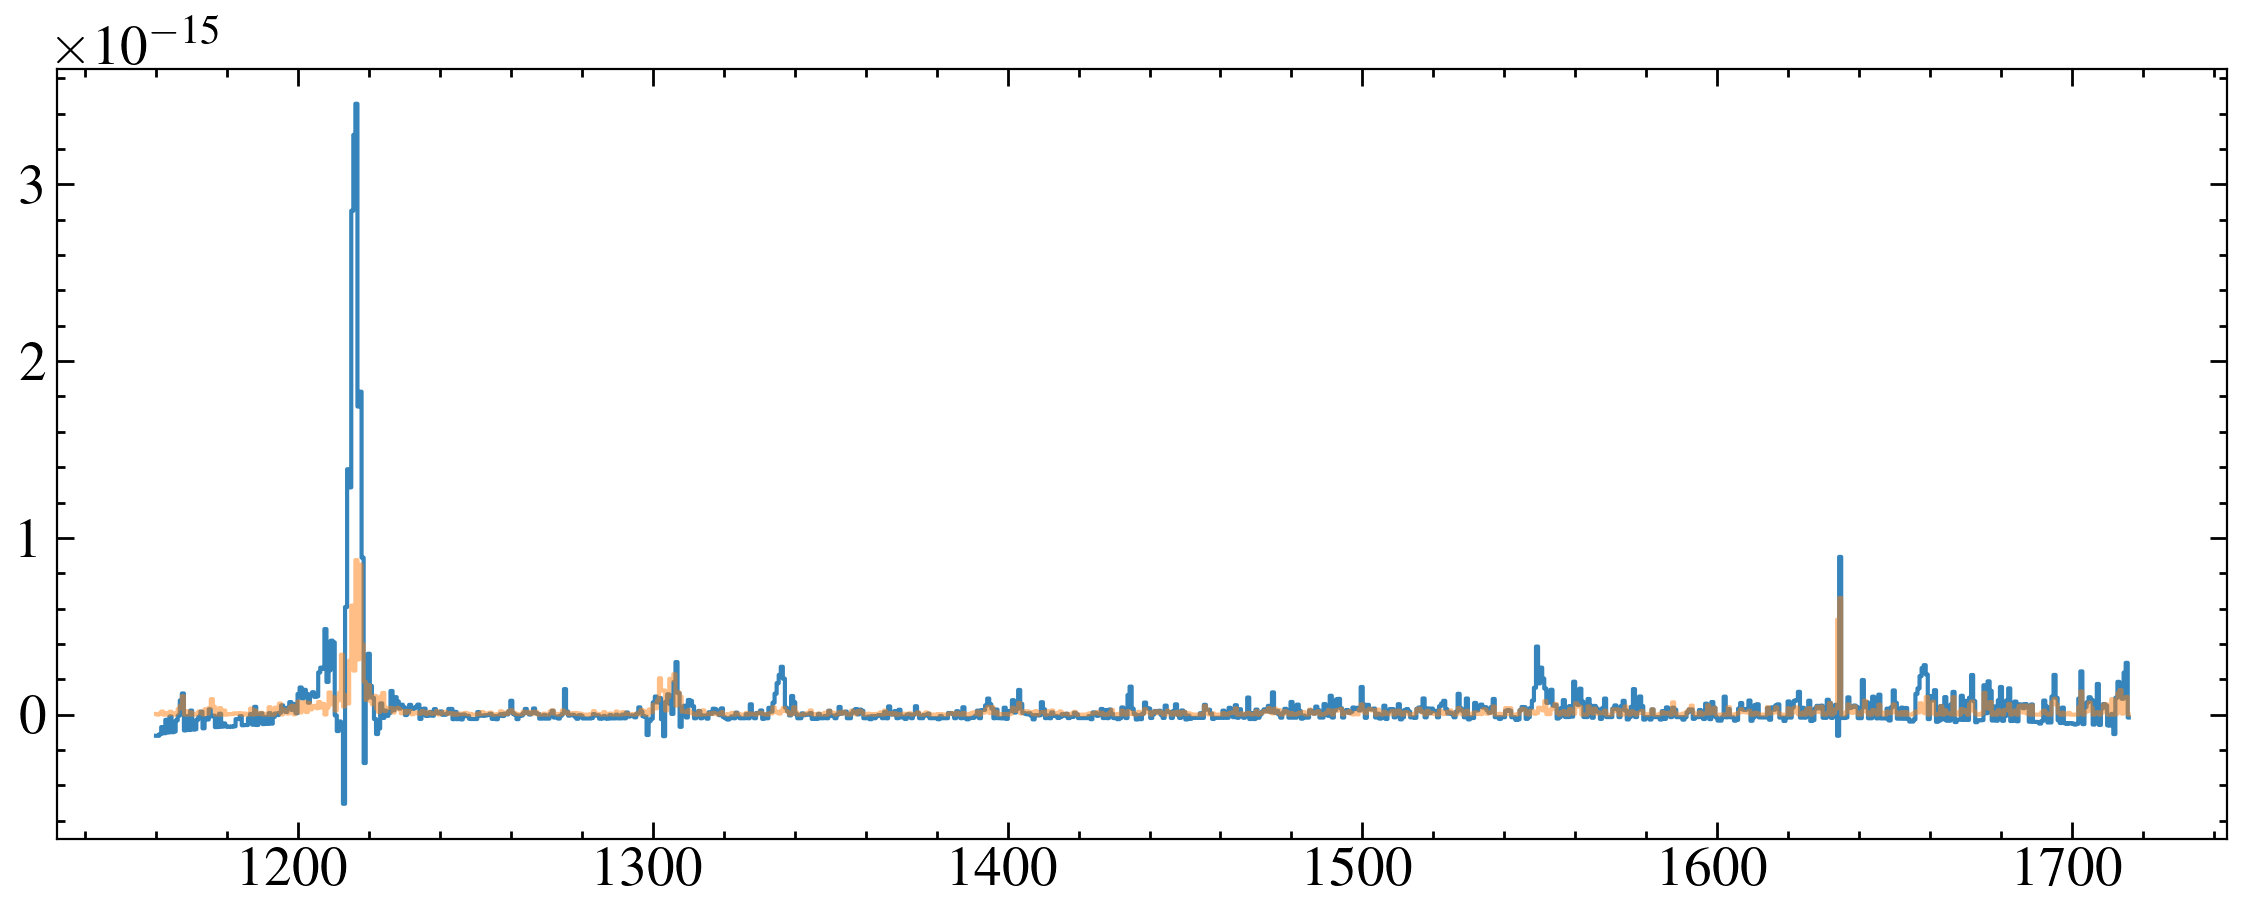

In [9]:
plt.step(w_fuv, f_fuv, where='mid', label='G140L', alpha=0.9)
plt.step(w_fuv, e_fuv, where='mid', alpha=0.5)


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/astropy/stats/funcs.py:698: RuntimeWarning: invalid value encountered in sqrt
  [n + 0.5 - np.sqrt(n + 0.25), n + 0.5 + np.sqrt(n + 0.25)]
/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


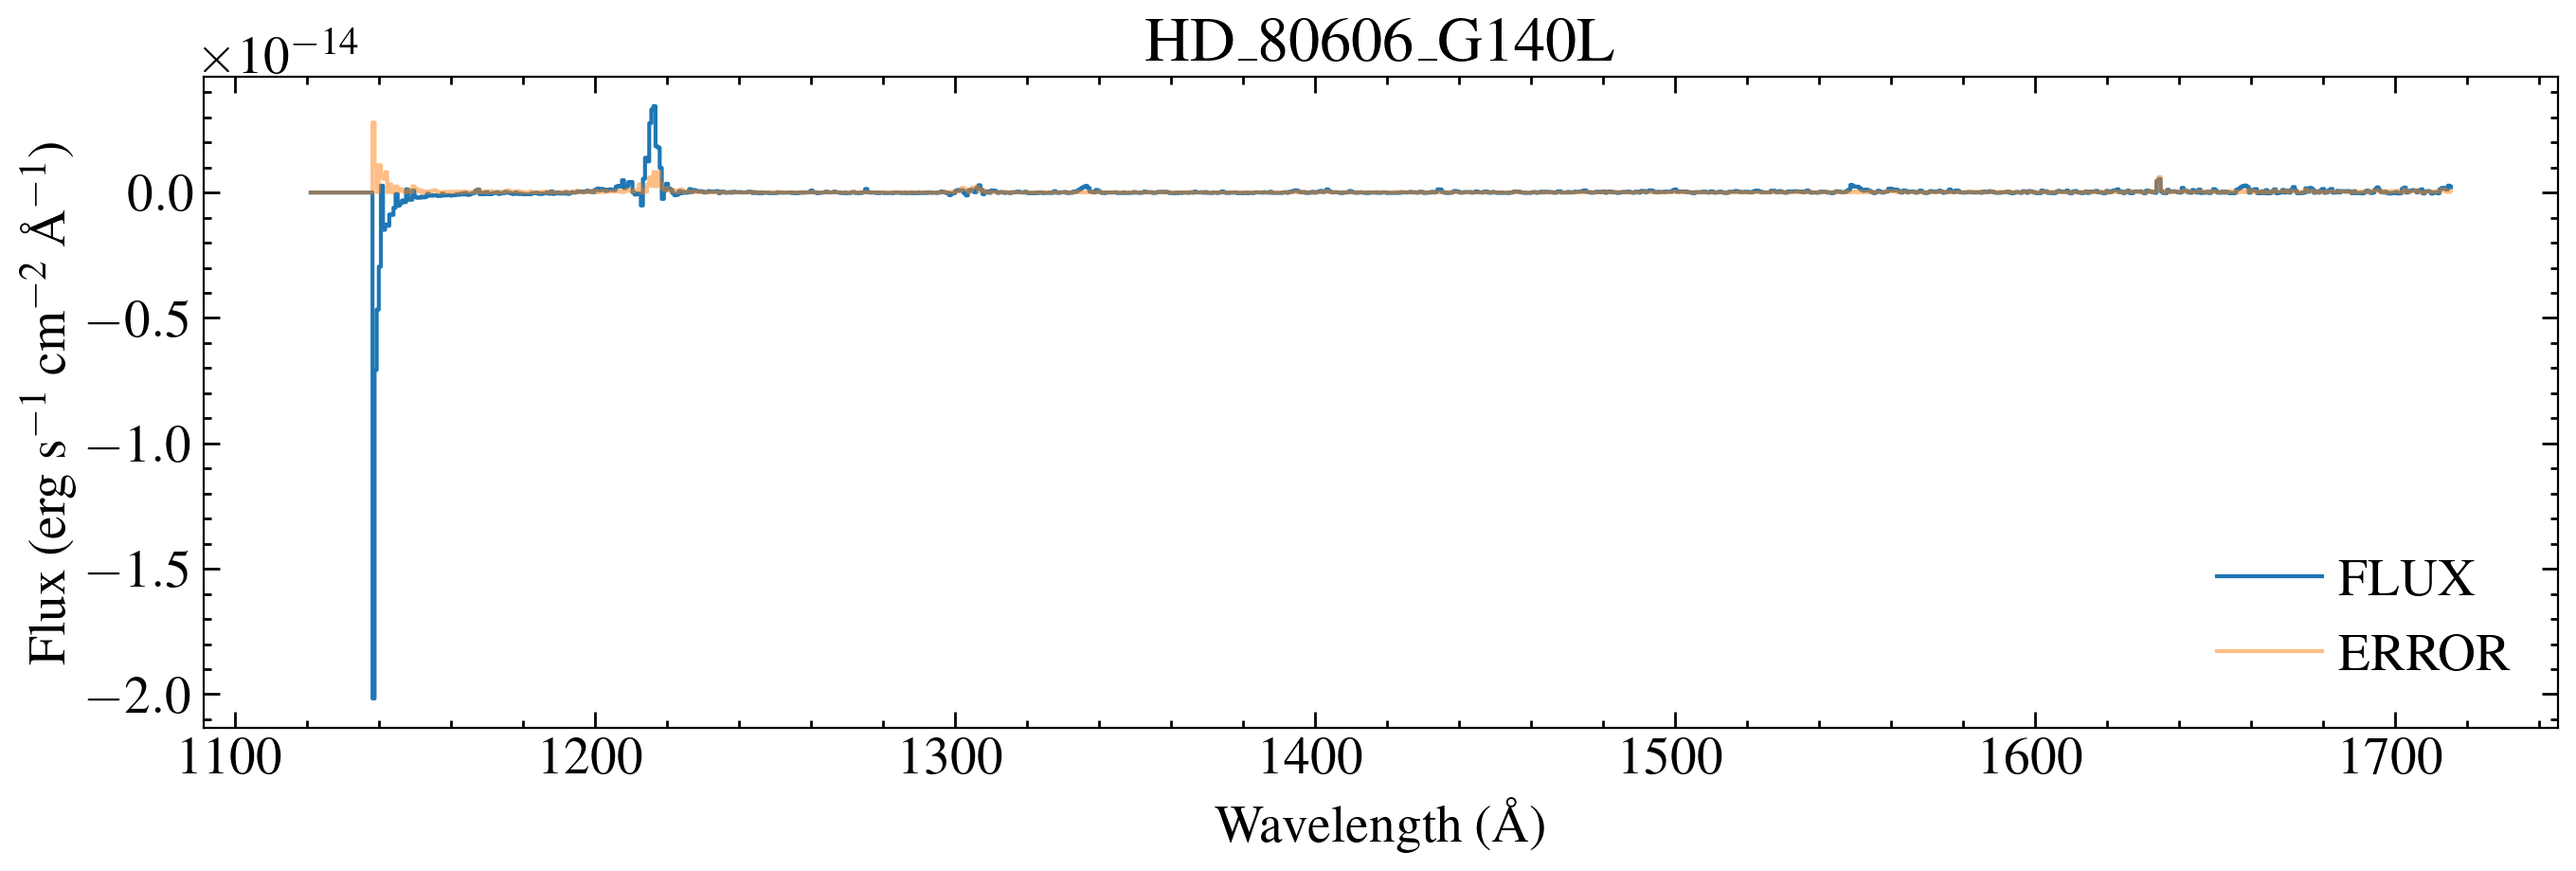

Spectrum saved as hlsp_muscles_hst_stis_hd_80606_g140l_v1_component-spec.fits


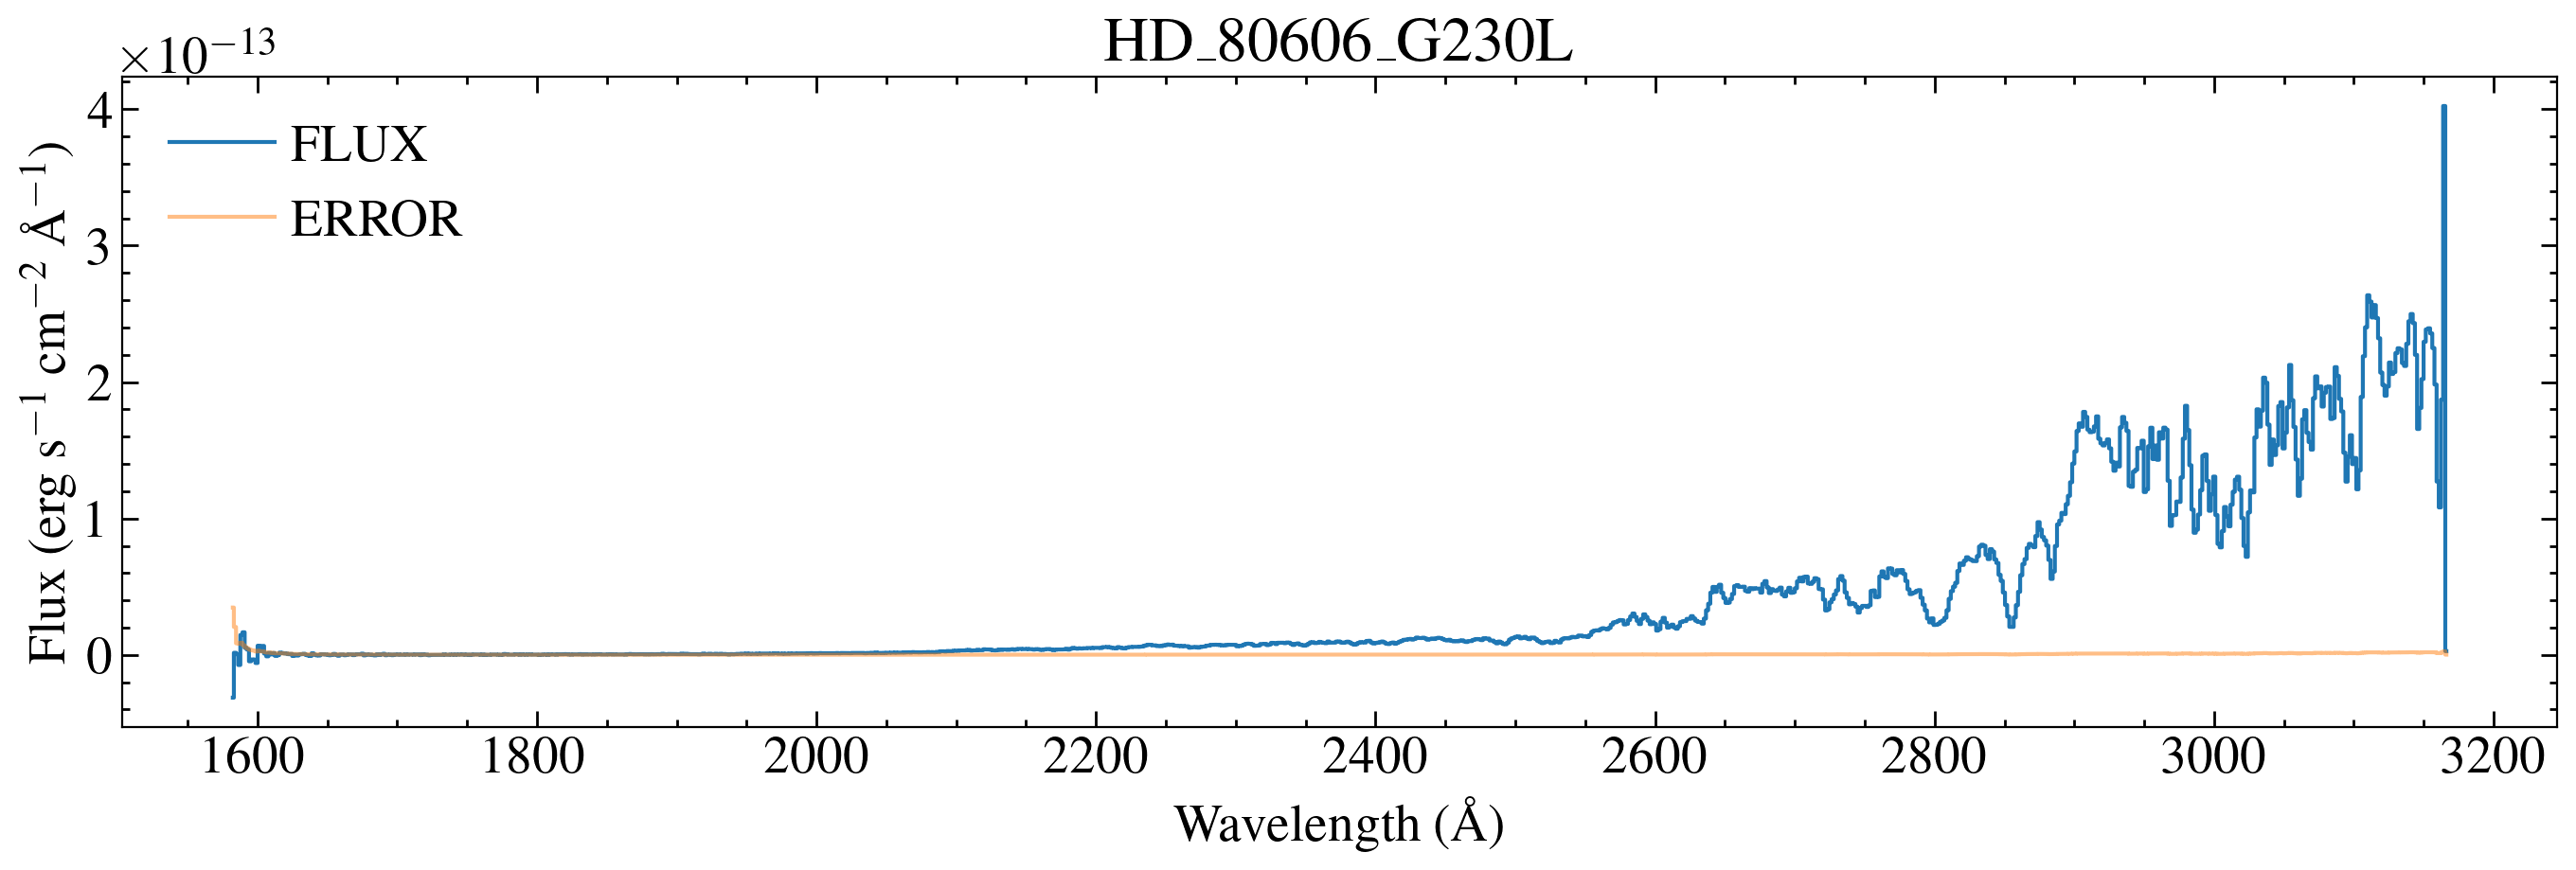

Spectrum saved as hlsp_muscles_hst_stis_hd_80606_g230l_v1_component-spec.fits


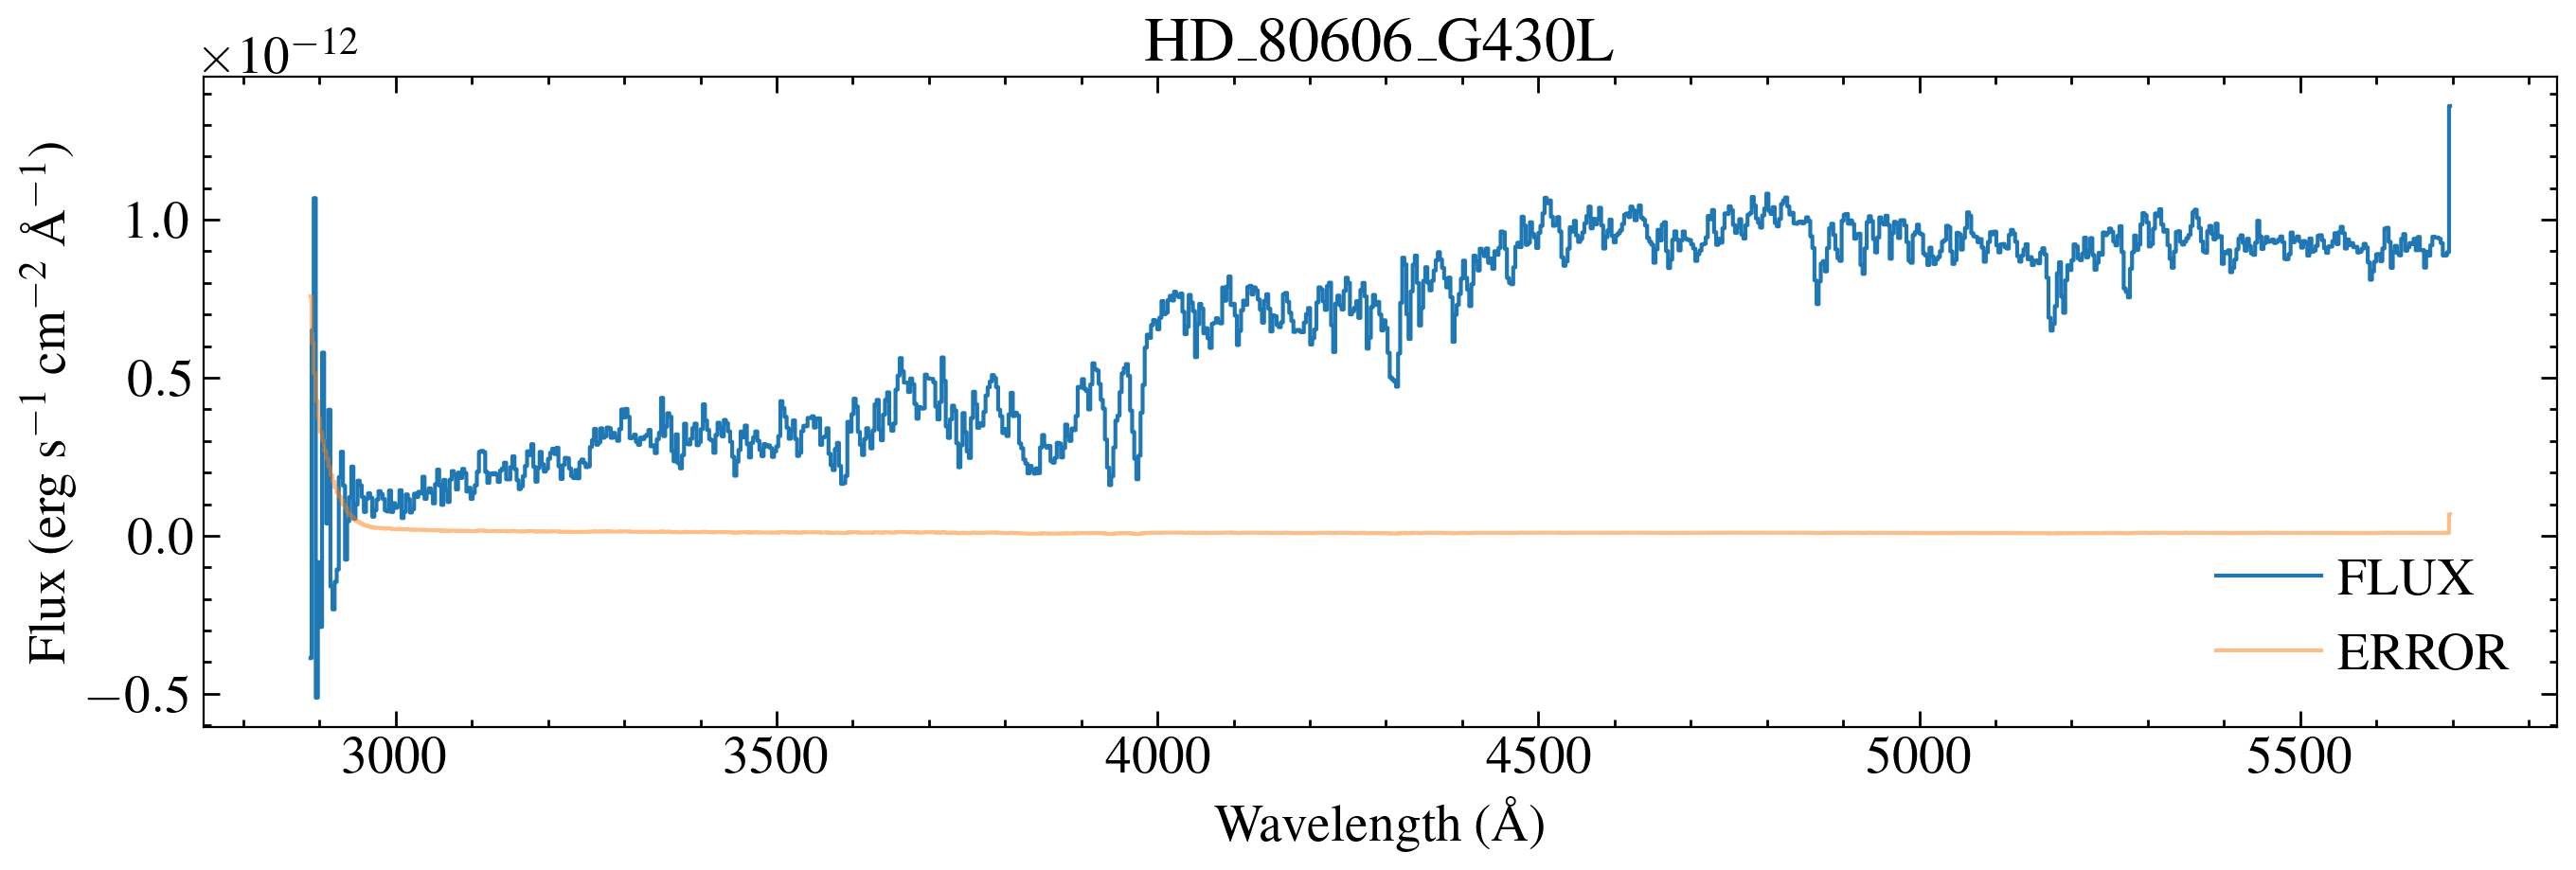

Spectrum saved as hlsp_muscles_hst_stis_hd_80606_g430l_v1_component-spec.fits


In [11]:
import prepare_stis
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/use_x1ds/'
savepath = 'draft_hlsp/hd80606/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'HD_80606')

In [3]:
hlsp_stis = glob.glob('draft_hlsp/hd80606/*stis*')
hlsp_stis

['draft_hlsp/hd80606/hlsp_muscles_hst_stis_hd_80606_g230l_v1_component-spec.fits',
 'draft_hlsp/hd80606/hlsp_muscles_hst_stis_hd_80606_g430l_v1_component-spec.fits',
 'draft_hlsp/hd80606/hlsp_muscles_hst_stis_hd_80606_g140l_v1_component-spec.fits']

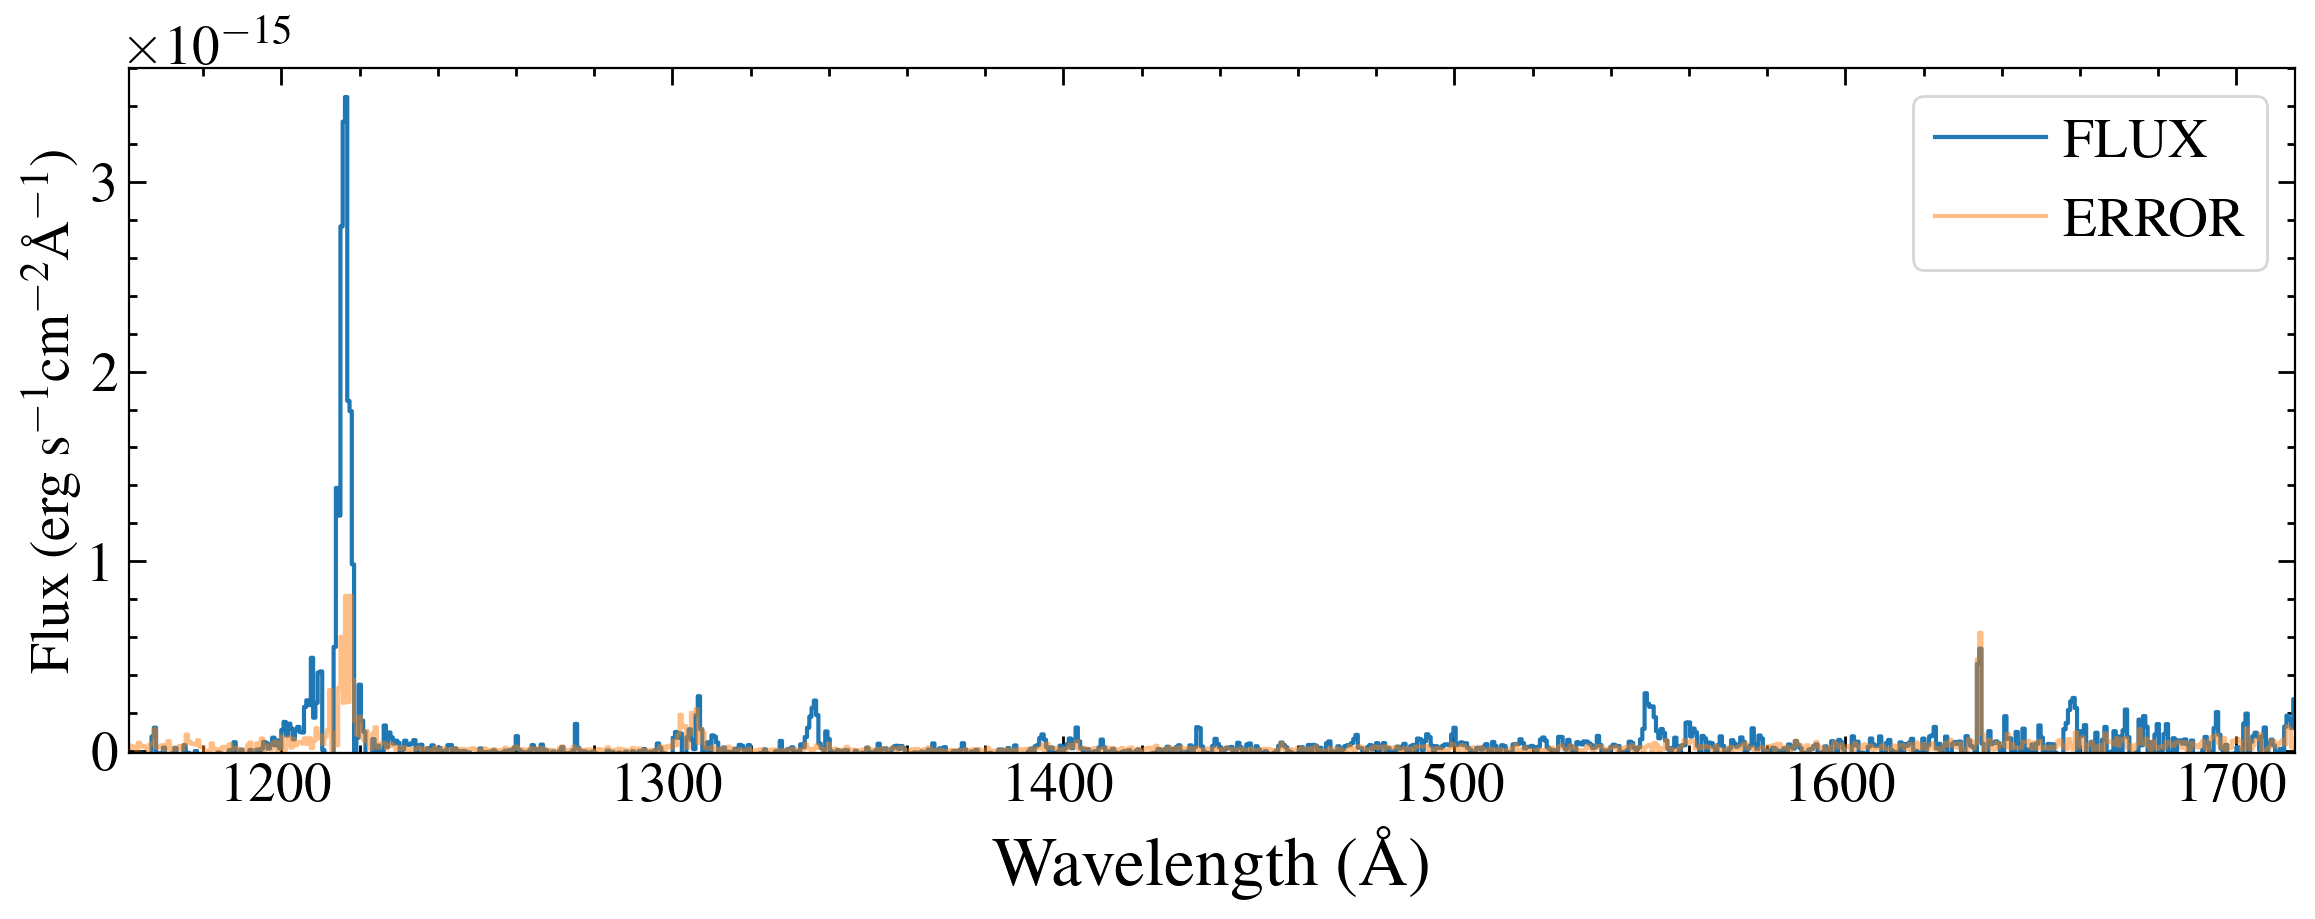

In [7]:
g140l = fits.getdata(hlsp_stis[2], 1)
fig, ax = plt.subplots(figsize=(12, 5))

mask = g140l['WAVELENGTH'] > 1160

ax.step(g140l['WAVELENGTH'][mask], g140l['FLUX'][mask], where='mid', label='FLUX')
ax.step(g140l['WAVELENGTH'][mask], g140l['ERROR'][mask], where='mid', alpha=0.5, label='ERROR')

ax.set_xlim(1161, 1715)

ax.set_ylim(-1e-17, 3.6e-15)
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')

ax.set_xlabel('Wavelength (\AA)', size=25)

ax.legend(frameon=True)
fig.tight_layout()